# Name of the Dataset: Trump Fake News Dataset

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re #for regex
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [36]:
from transformers import T5Tokenizer, T5ForConditionalGeneration #using it for filling title label null values

In [2]:
df = pd.read_csv("D:\Dataset\Fake News.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Features Description:
	- id: unique identifier for each news article.
	- title: The title of the news article.
	- author: The author of the news article.
	- text: The main content of the news article.
	- label: Indicator of the article's authenticity(0 or 1):
   		- 1 indicates the news is fake.
   		- 0 indicates the news is real.

In [4]:
print(f"The dataset have {df.shape[0]} datapoints and {df.shape[1]} features.")

The dataset have 20800 datapoints and 5 features.


Text(0.5, 1.0, 'Countplot of Real vs Fake Data')

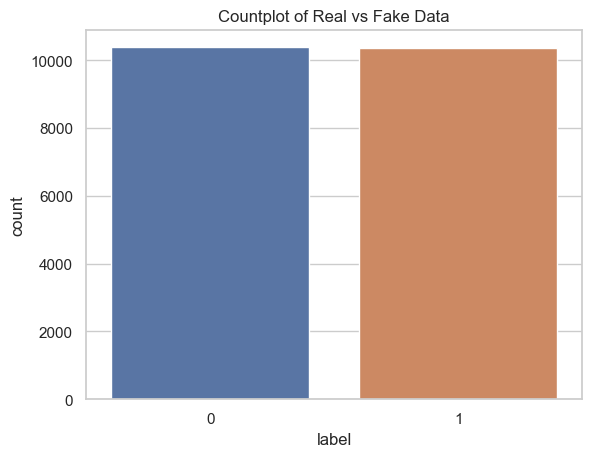

In [40]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["label"])
plt.title('Countplot of Real vs Fake Data')

## We have approxiomately equal no real and fake news, hence the dataset is balanced.

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# Data Preprocessing and Cleaning

In [6]:
df["author"].fillna("Anonymous", inplace=True) #Filling null author with Anonymous

In [7]:
df.isnull().sum()

id          0
title     558
author      0
text       39
label       0
dtype: int64

In [9]:
df = df.dropna(subset=['text'])

In [10]:
df_no_title = df[df['title'].isnull()]

df_no_title

,id,title,author,text,label
53,53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1
124,124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1
196,196,NaN,Raffie,They got the heater turned up on high.,1
...,...,...,...,...,...
20568,20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1
20627,20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1
20636,20636,NaN,Dave Lowery,Trump all the way!,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1


In [11]:
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

def generate_title(text):
    input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    title_ids = model.generate(input_ids, max_length=20, min_length=5, length_penalty=2.0, num_beams=4, early_stopping=True)
    title = tokenizer.decode(title_ids[0], skip_special_tokens=True)
    return title

df_no_title = df[df['title'].isnull()]

df_no_title['title'] = df_no_title['text'].apply(generate_title)

df.update(df_no_title)

df.to_csv('Fake_news_final_updated.csv', index=False)

C:\Users\linar\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=True`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
C:\Users\linar\AppData\Local\Temp\ipykernel_10972\904192920.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df_new = pd.read_csv("Fake_news_final_updated.csv") #Saved it in csv file to save time from previous steps.

In [5]:
df_new.isnull().sum()

id        0
title     1
author    0
text      0
label     0
dtype: int64

In [6]:
df_no_title = df_new[df_new['title'].isnull()]

df_no_title

,id,title,author,text,label
13862,13892,NaN,Jeannette,🙂,1


In [7]:
df_new = df_new.dropna(subset=['title'])

In [8]:
df_new.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
df_new.duplicated().sum()

0

## The data has no duplicate values

Text(0.5, 1.0, 'Countplot of Real vs Fake Data')

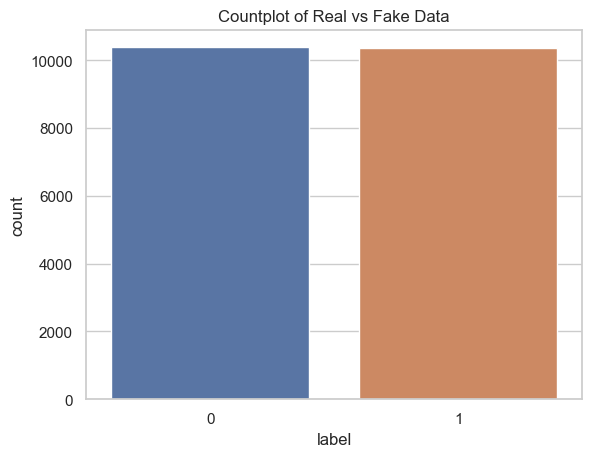

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df_new["label"])
plt.title('Countplot of Real vs Fake Data')

In [11]:
df_new['combined'] = df_new['title'] + ' ' + df_new['author'] + ' ' + df_new['text']

df_new.head()

,id,title,author,text,label,combined
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [12]:
print(df_new.iloc[0]['combined'])

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of t

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\linar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\linar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\linar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
def lemmatize(content):
    content = re.sub('[^a-zA-Z]', ' ', content)
    content = content.lower()
    tokens = word_tokenize(content)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    lemmas = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    lemmatized_content = ' '.join(lemmas)
    return lemmatized_content

In [16]:
df_new['clean_text'] = df_new['combined'].apply(lemmatize)

In [22]:
print(df_new.iloc[0]['clean_text'])

house dem aide even see comey letter jason chaffetz tweeted darrell lucus house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case